In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.4 MB/s eta 0:00:0000:0100:04
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 693.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 290.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 745.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 KB 3.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 5.9 MB/s eta 0:00:0000:0100:01
  Attempting unins

In [5]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 918.4 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 4.3 MB/s eta 0:00:0000:0100:01


In [6]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import math 
import numpy as np

2023-10-23 12:41:39.981662: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 12:41:40.047891: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 12:41:40.047945: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 12:41:40.047993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 12:41:40.057568: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-23 12:41:40.058392: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [7]:
apple = yf.Ticker("AAPL")
apple.history(start='2001-01-19', end='2022-05-13', actions=False)

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,0.294616,0.296510,0.283248,0.295563,776664000
2001-01-22 00:00:00-05:00,0.288932,0.297457,0.279459,0.291774,519327200
2001-01-23 00:00:00-05:00,0.292721,0.317351,0.288932,0.310720,879530400
2001-01-24 00:00:00-05:00,0.312615,0.313562,0.296510,0.310720,717091200
2001-01-25 00:00:00-05:00,0.311668,0.311668,0.299353,0.302194,489708800
...,...,...,...,...,...
2022-05-06 00:00:00-04:00,154.874826,158.279877,153.058140,156.135590,116124600
2022-05-09 00:00:00-04:00,153.802664,154.696125,150.387708,150.953552,131577900
2022-05-10 00:00:00-04:00,154.388388,155.599512,151.817222,153.385727,115366700


In [8]:
df = apple.history(start='2001-01-19', end='2022-05-13', actions=False)
df.index  

DatetimeIndex(['2001-01-19 00:00:00-05:00', '2001-01-22 00:00:00-05:00',
               '2001-01-23 00:00:00-05:00', '2001-01-24 00:00:00-05:00',
               '2001-01-25 00:00:00-05:00', '2001-01-26 00:00:00-05:00',
               '2001-01-29 00:00:00-05:00', '2001-01-30 00:00:00-05:00',
               '2001-01-31 00:00:00-05:00', '2001-02-01 00:00:00-05:00',
               ...
               '2022-04-29 00:00:00-04:00', '2022-05-02 00:00:00-04:00',
               '2022-05-03 00:00:00-04:00', '2022-05-04 00:00:00-04:00',
               '2022-05-05 00:00:00-04:00', '2022-05-06 00:00:00-04:00',
               '2022-05-09 00:00:00-04:00', '2022-05-10 00:00:00-04:00',
               '2022-05-11 00:00:00-04:00', '2022-05-12 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5363, freq=None)

In [9]:
## EDA 
print(df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print("number of null values in each column", df.isnull().sum())
print("number of NaN values in each column", df.isna().sum())

(5363, 5)
                               Open      High       Low     Close     Volume
Date                                                                        
2001-01-19 00:00:00-05:00  0.294616  0.296510  0.283248  0.295563  776664000
2001-01-22 00:00:00-05:00  0.288932  0.297457  0.279459  0.291774  519327200
2001-01-23 00:00:00-05:00  0.292721  0.317351  0.288932  0.310720  879530400
2001-01-24 00:00:00-05:00  0.312615  0.313562  0.296510  0.310720  717091200
2001-01-25 00:00:00-05:00  0.311668  0.311668  0.299353  0.302194  489708800
                                 Open        High         Low       Close  \
Date                                                                        
2022-05-06 00:00:00-04:00  154.874826  158.279877  153.058140  156.135590   
2022-05-09 00:00:00-04:00  153.802664  154.696125  150.387708  150.953552   
2022-05-10 00:00:00-04:00  154.388388  155.599512  151.817222  153.385727   
2022-05-11 00:00:00-04:00  152.383071  154.318879  144.749024  145

In [10]:
# taking only the close column
df = df[['Close']]
print(df.head())

                              Close
Date                               
2001-01-19 00:00:00-05:00  0.295563
2001-01-22 00:00:00-05:00  0.291774
2001-01-23 00:00:00-05:00  0.310720
2001-01-24 00:00:00-05:00  0.310720
2001-01-25 00:00:00-05:00  0.302194


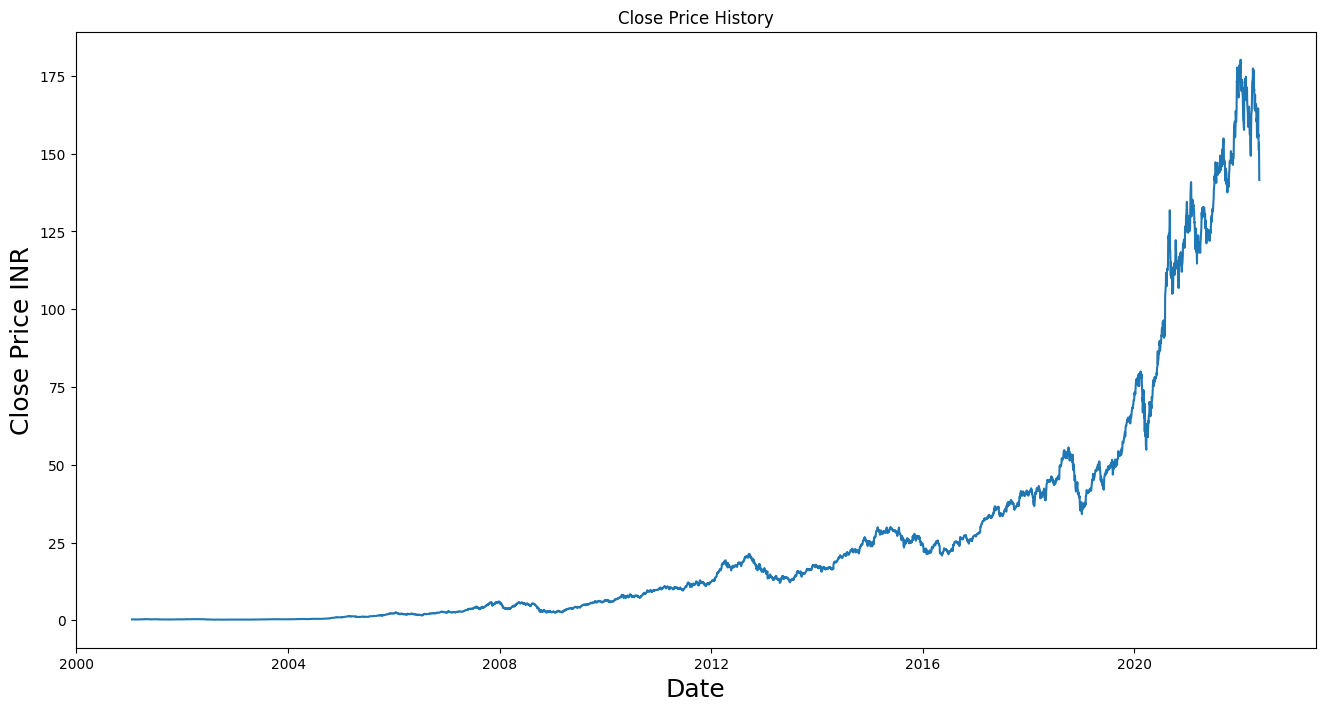

In [11]:
# plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

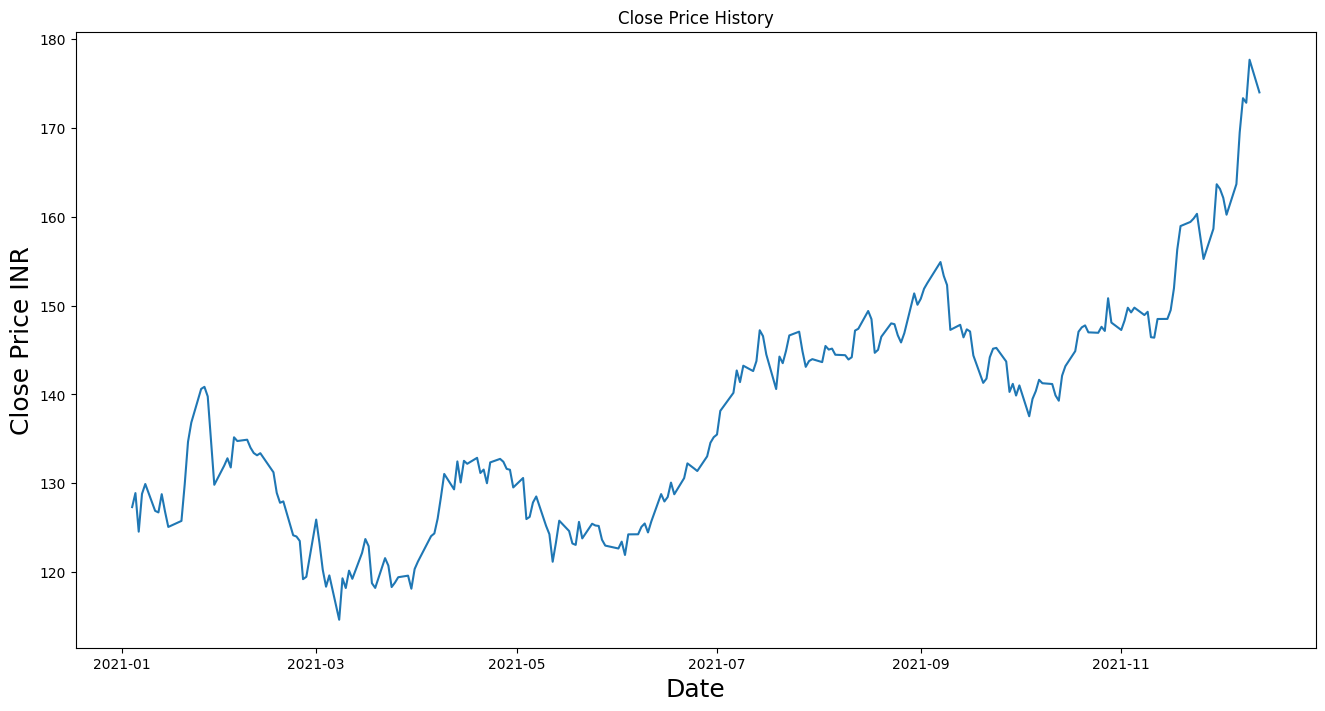

In [12]:
# plotting the prices in year 2021
df_2021 = df.loc['2021-01-01':'2021-12-13']
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df_2021['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [13]:
data = df.values
print(data.shape)

(5363, 1)


In [14]:
# take only data from 2021 for training
train_data = data[:len(data)-500]
test_data = data[len(data)-500:]

In [16]:
min_max_scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = min_max_scalar.fit_transform(data)

In [17]:
trainLen = int(0.9*len(data))
testLen = len(data) - trainLen
train_data = scaled_data[0:trainLen,:]
test_data = scaled_data[trainLen:len(data),:]

In [21]:
def genData(data, look_back, predLen=1):
    X, Y = [], []
    for i in range(len(data)-look_back-predLen):
        a = np.array(data[i:(i+look_back), 0])
        X.append(a.reshape(-1,1))
        b = np.array(data[(i+look_back):(i+look_back+predLen), 0])
        Y.append(b.reshape(-1,1))
        
    return np.array(X), np.array(Y)

In [22]:
Xtrain, Ytrain = genData(train_data, 30, 1)
Ytrain = np.array(Ytrain)
Ytrain = Ytrain.reshape(Ytrain.shape[0], Ytrain.shape[2])
# convert n,1 to n, 
Ytrain = np.array(np.squeeze(Ytrain))

In [23]:
Xtrain = np.array(Xtrain)
print("shape of Xtrain", Ytrain.shape)

shape of Xtrain (4795,)


In [24]:
## similarly generate test data
Xtest, Ytest = genData(test_data, 30, 1)

In [25]:
print("shape of Xtest", Xtest.shape)
print("shape of Ytest", Ytest.shape)

shape of Xtest (506, 30, 1)
shape of Ytest (506, 1, 1)


In [29]:
## LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(Xtrain.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))


2023-10-23 12:50:05.945786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-23 12:50:06.126454: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [30]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [31]:
history = model.fit(Xtrain, Ytrain, epochs=100, batch_size=64)

Epoch 1/100
75/75 [==============================] - 4s 15ms/step - loss: 7.1159e-04
Epoch 2/100
75/75 [==============================] - 1s 15ms/step - loss: 3.1228e-05
Epoch 3/100
75/75 [==============================] - 1s 16ms/step - loss: 3.2374e-05
Epoch 4/100
75/75 [==============================] - 1s 15ms/step - loss: 2.7470e-05
Epoch 5/100
75/75 [==============================] - 1s 15ms/step - loss: 2.8928e-05
Epoch 6/100
75/75 [==============================] - 1s 15ms/step - loss: 2.8086e-05
Epoch 7/100
75/75 [==============================] - 1s 15ms/step - loss: 2.5503e-05
Epoch 8/100
75/75 [==============================] - 1s 16ms/step - loss: 2.1320e-05
Epoch 9/100
75/75 [==============================] - 1s 15ms/step - loss: 2.5029e-05
Epoch 10/100
75/75 [==============================] - 1s 15ms/step - loss: 2.2502e-05
Epoch 11/100
75/75 [==============================] - 1s 15ms/step - loss: 2.3867e-05
Epoch 12/100
75/75 [==============================] - 1s 15ms/s

In [32]:
x_test = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [33]:
x_test.shape

(506, 30, 1)

In [34]:
pred = model.predict(x_test)
pred.shape

16/16 [==============================] - 1s 5ms/step


(506, 1)

In [35]:
pred = min_max_scalar.inverse_transform(pred)


In [36]:
pred

array([[ 75.82367 ],
       [ 77.210175],
       [ 76.79106 ],
       [ 75.78374 ],
       [ 75.85284 ],
       [ 75.60152 ],
       [ 76.998116],
       [ 77.10525 ],
       [ 78.25367 ],
       [ 78.085175],
       [ 78.318924],
       [ 77.91779 ],
       [ 78.016716],
       [ 78.074295],
       [ 78.007065],
       [ 78.74374 ],
       [ 79.25277 ],
       [ 79.6935  ],
       [ 79.19665 ],
       [ 80.81975 ],
       [ 81.713974],
       [ 83.9821  ],
       [ 86.35271 ],
       [ 83.42193 ],
       [ 82.90692 ],
       [ 83.75787 ],
       [ 85.94984 ],
       [ 86.48544 ],
       [ 86.51686 ],
       [ 86.02914 ],
       [ 87.71084 ],
       [ 89.78361 ],
       [ 88.92871 ],
       [ 89.46264 ],
       [ 87.309616],
       [ 88.29902 ],
       [ 89.33989 ],
       [ 89.45712 ],
       [ 89.392334],
       [ 91.31948 ],
       [ 91.59348 ],
       [ 93.29202 ],
       [ 94.02188 ],
       [ 94.19656 ],
       [ 93.76455 ],
       [ 94.90379 ],
       [ 95.79533 ],
       [ 94.9

In [37]:
Ytest = np.array(np.squeeze(Ytest))

In [38]:
y_actual = min_max_scalar.inverse_transform([Ytest]).T
y_actual 

array([[ 77.21508026],
       [ 76.33263397],
       [ 75.41098785],
       [ 75.87426758],
       [ 75.42571259],
       [ 77.20281219],
       [ 76.75669861],
       [ 78.2494812 ],
       [ 77.66607666],
       [ 78.16614532],
       [ 77.6366806 ],
       [ 77.97493744],
       [ 78.00924683],
       [ 77.93326569],
       [ 78.89170074],
       [ 79.25691986],
       [ 79.69321442],
       [ 79.00688171],
       [ 81.25708771],
       [ 81.73750305],
       [ 84.3186264 ],
       [ 86.4879303 ],
       [ 82.33561707],
       [ 83.04644775],
       [ 84.07349396],
       [ 86.30163574],
       [ 86.18154144],
       [ 86.21586609],
       [ 85.72315216],
       [ 87.96600342],
       [ 89.8436203 ],
       [ 88.25770569],
       [ 89.42937469],
       [ 86.68158722],
       [ 88.67931366],
       [ 89.41957092],
       [ 89.25042725],
       [ 89.25042725],
       [ 91.63790131],
       [ 91.3535614 ],
       [ 93.48118591],
       [ 93.8832016 ],
       [ 94.04743195],
       [ 93

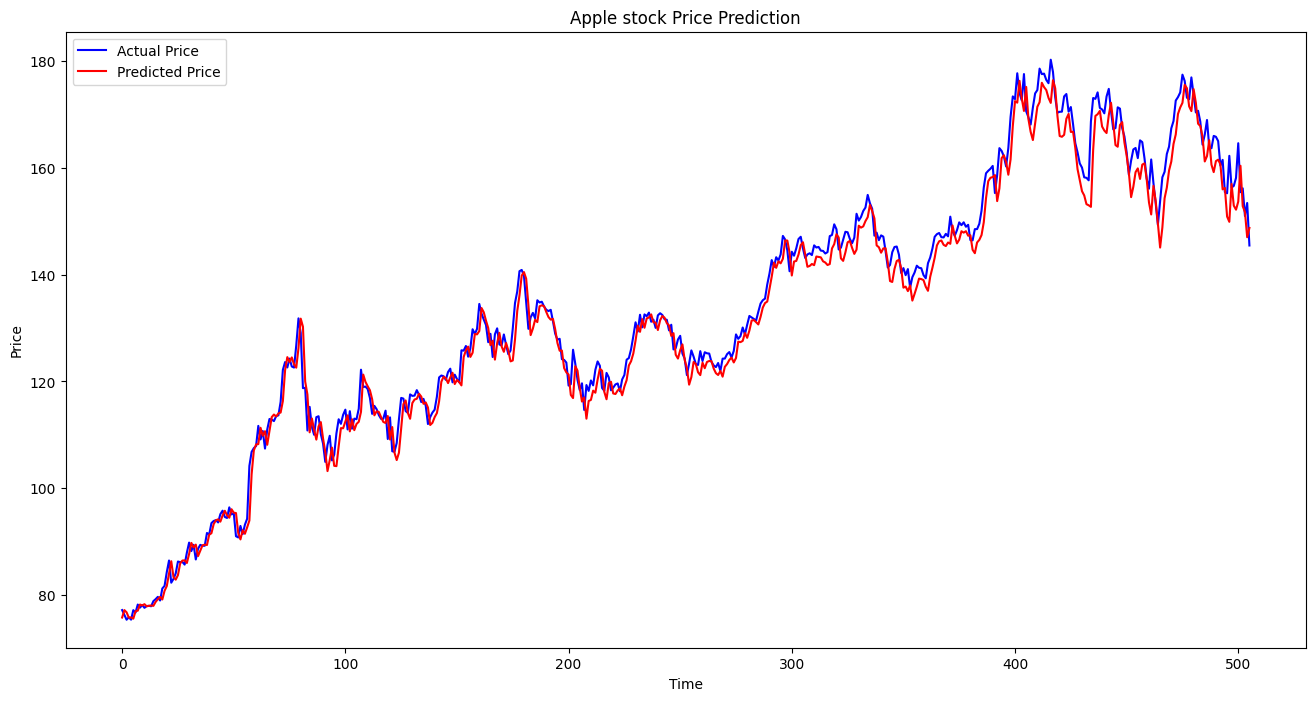

In [39]:
plt.figure(figsize=(16,8))
plt.plot(y_actual, color='blue', label='Actual Price')
plt.plot(pred , color='red', label='Predicted Price')
plt.title('Apple stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()